# Lab 7.04 - Time series analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

### Exercise 4 - Airline ticket data

Consider the airline ticket data in the file airline ticket data.csv  

- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Create and train the model. Predict the values for the next 12 months.
- Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_6660\4084518144.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Tickets
Month,
2018-01-01,605
2018-02-01,647
2018-03-01,636
2018-04-01,612
2018-05-01,714


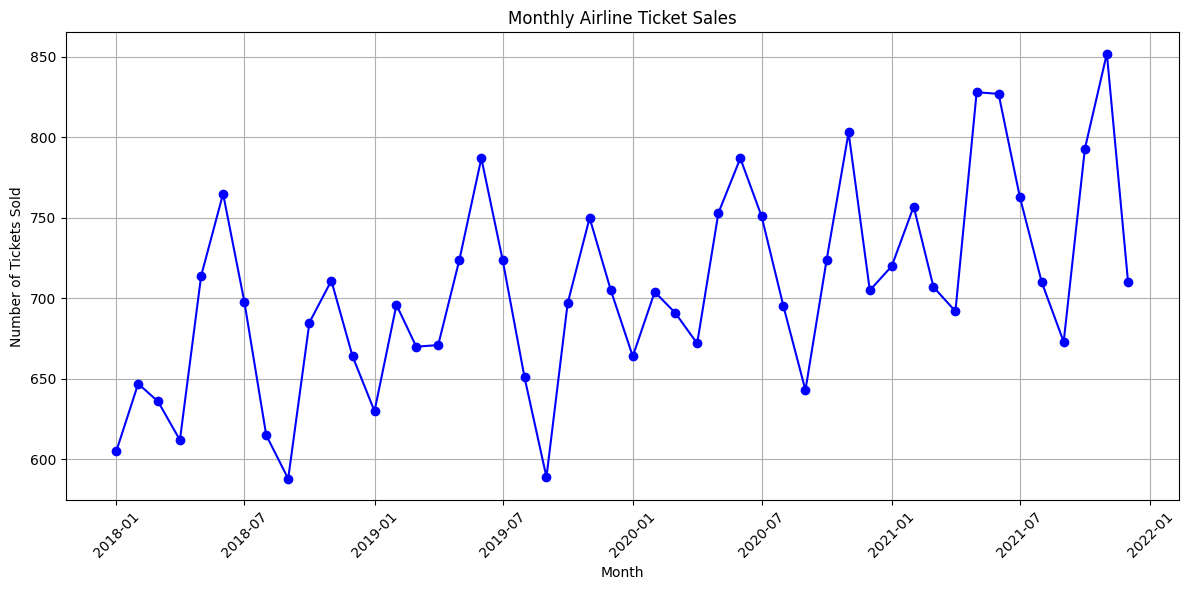

In [ ]:
# - Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Tickets'], marker='o', linestyle='-', color='b')
plt.title('Monthly Airline Ticket Sales')
plt.xlabel('Month') 
plt.ylabel('Number of Tickets Sold')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
# The time series chart shows a clear trend and seasonality in the data. The number of tickets sold appears to increase over time, with peaks and troughs that suggest a seasonal pattern. Given this observation, an appropriate model for forecasting would be the Holt-Winters Exponential Smoothing model, which can capture both trend and seasonality in the data.

c:\Users\Gebruiker\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


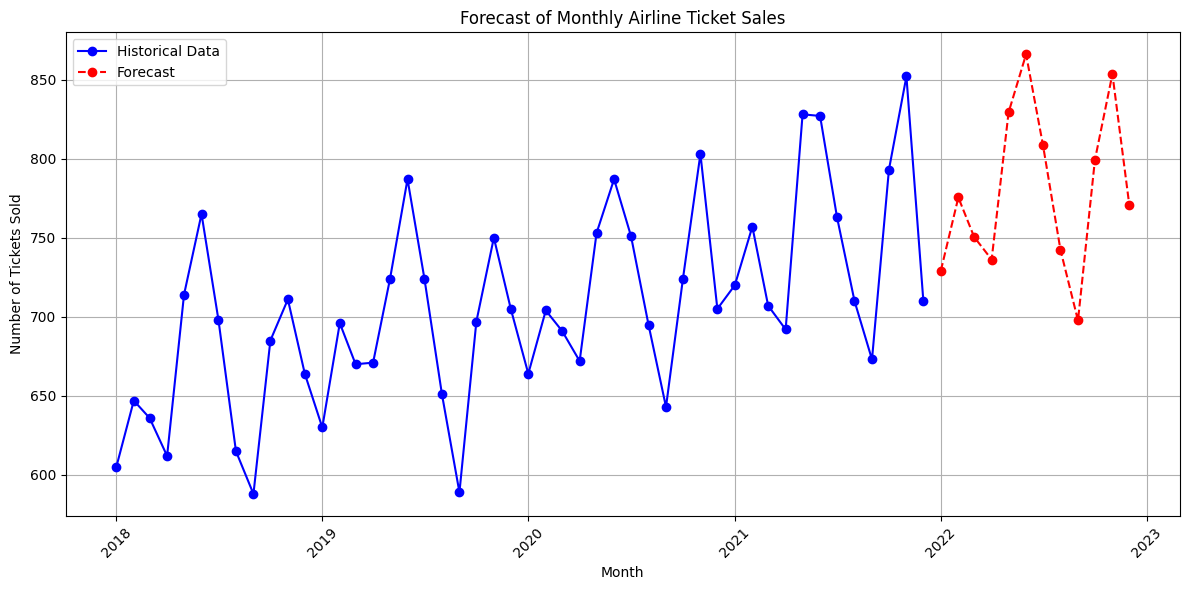

In [4]:
# - Create and train the model. Predict the values for the next 12 months.
model = ExponentialSmoothing(data['Tickets'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
# Predict the next 12 months
forecast = model_fit.forecast(steps=12)
# - Visualise the results of the model.
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Tickets'], marker='o', linestyle='-', color='b', label='Historical Data')
plt.plot(forecast.index, forecast, marker='o', linestyle='--', color='r', label='Forecast')
plt.title('Forecast of Monthly Airline Ticket Sales')
plt.xlabel('Month')
plt.ylabel('Number of Tickets Sold')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


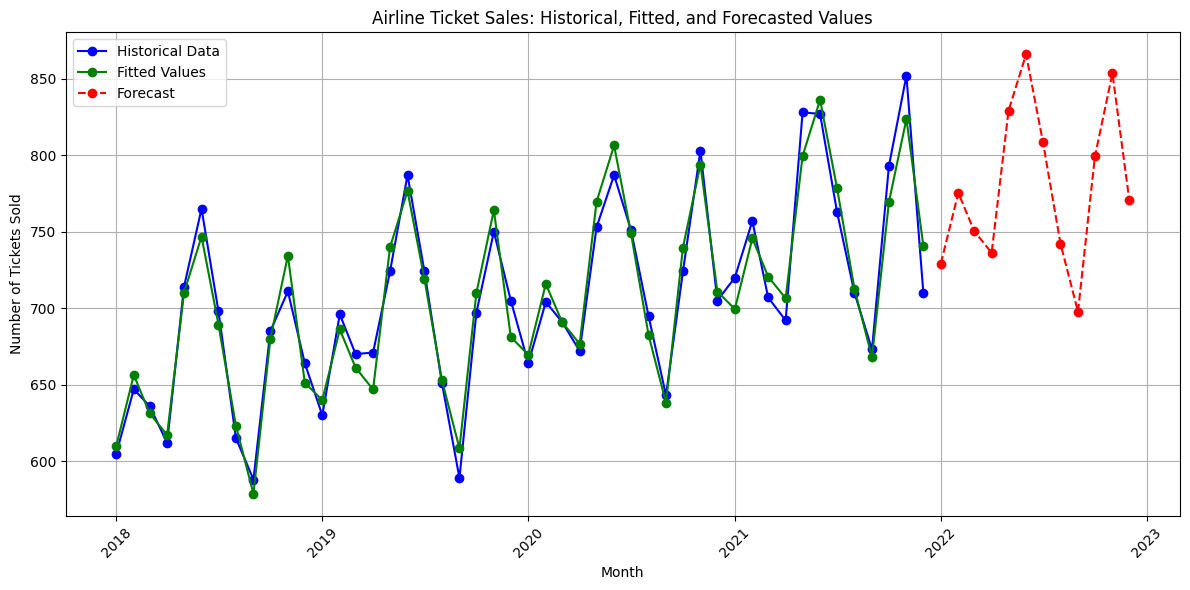

In [5]:
# - Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Tickets'], marker='o', linestyle='-', color='b', label='Historical Data')
plt.plot(model_fit.fittedvalues.index, model_fit.fittedvalues, marker='o', linestyle='-', color='g', label='Fitted Values')
plt.plot(forecast.index, forecast, marker='o', linestyle='--', color='r', label='Forecast')
plt.title('Airline Ticket Sales: Historical, Fitted, and Forecasted Values')
plt.xlabel('Month')
plt.ylabel('Number of Tickets Sold')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Source
Business Analytics Data Analysis & Decision Making 